<a href="https://colab.research.google.com/github/Nalina655/water-quality-prediction/blob/main/mlproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Col

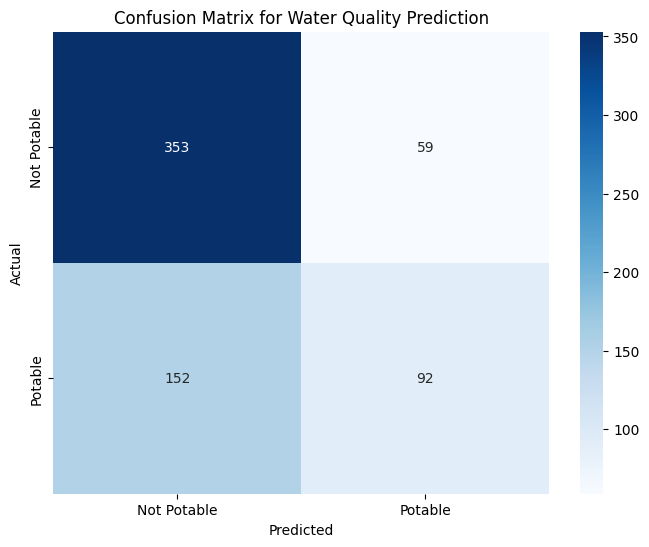


Model Evaluation:
Accuracy: 0.6783536585365854

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



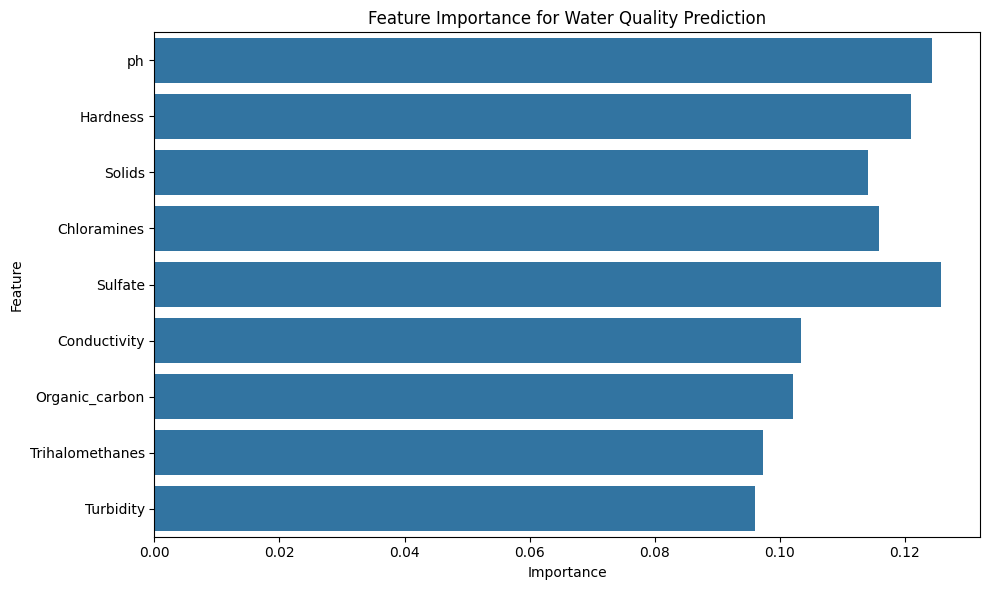


Model saved as 'water_quality_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the dataset
try:
    data = pd.read_csv('water_potability.csv', encoding='ISO-8859-1')  # Fix encoding issue
except Exception as e:
    print("Error loading CSV:", e)
    exit()

# Step 2: Explore the dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset info:")
print(data.info())

print("\nMissing values per column:")
print(data.isnull().sum())

# Step 3: Handle missing values (fill with mean)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Step 4: Define features and target
if 'Potability' not in data.columns:raise ValueError("The dataset must contain a 'Potability' column as the target variable.")

X = data.drop('Potability', axis=1)
y = data['Potability']

# Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model and generate confusion matrix
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.title("Confusion Matrix for Water Quality Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Evaluate the model
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize Feature Importances
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance for Water Quality Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 9: Save the model (optional)
import joblib
joblib.dump(model, 'water_quality_model.pkl')
print("\nModel saved as 'water_quality_model.pkl'")
